Let's do a deep dive and start visualizing my life using Fitbit and Matplotlib. 

# What is Fitbit

[Fitbit](https://www.fitbit.com) is a fitness watch that tracks your sleep, heart rate, and activity.
Fitbit is able to track your steps, however, it is also able to detect multiple types of activity
like running, walking, "sport" and biking.

# What is Matplotlib

[Matplotlib](https://matplotlib.org/) is a python visualization library that enables you to create bar graphs, line graphs, distributions and many more things.
Being able to visualize your results is essential to any person working with data at any scale.
Although I like [GGplot](https://ggplot2.tidyverse.org/) in R more than Matplotlib, Matplotlib is still my go to graphing library for Python. 

# Getting Your Fitbit Data

There are two main ways that you can get your Fitbit data:

- Fitbit API
- Data Archival Export


Since connecting to the API and setting up all the web hooks can be a pain, I'm just going to use the data export option because this is only for one person.
You can export your data here: [https://www.fitbit.com/settings/data/export](https://www.fitbit.com/settings/data/export).

![Data export on fitbit's website](dataExport.png)

The Fitbit data archive was very organized and kept meticulous records of everything. 
All of the data was organized in separate JSON files labeled by date.
Fitbit keeps around 1MB of data on you per day; most of this data is from the heart rate sensors.
Although 1MB of data may sound like a ton of data, it is probably a lot less if you store it in formats other than JSON. 
When I downloaded the compressed file it was 20MB, but when I extracted it, it was 380MB!
I've only been using Fitbit for 11 months at this point. 

![compressed data](compression.png)

## Sleep

Sleep is something fun to visualize.
No matter how much of it you get you still feel tired as a college student.
In the "sleep_score" folder of the exported data you will find a single CSV file with your resting heart rate and Fitbit's computed sleep scores.
Interesting enough, this is the only file that comes in the CSV format, everything else is JSON file. 

We can read in all the data using a single liner with the [Pandas](https://pandas.pydata.org/) python library.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

sleep_score_df = pd.read_csv('data/sleep/sleep_score.csv')

In [2]:
print(sleep_score_df)

     sleep_log_entry_id             timestamp  overall_score  \
0           26093459526  2020-02-27T06:04:30Z             80   
1           26081303207  2020-02-26T06:13:30Z             83   
2           26062481322  2020-02-25T06:00:30Z             82   
3           26045941555  2020-02-24T05:49:30Z             79   
4           26034268762  2020-02-23T08:35:30Z             75   
..                  ...                   ...            ...   
176         23696231032  2019-09-02T07:38:30Z             79   
177         23684345925  2019-09-01T07:15:30Z             84   
178         23673204871  2019-08-31T07:11:00Z             74   
179         23661278483  2019-08-30T06:34:00Z             73   
180         23646265400  2019-08-29T05:55:00Z             80   

     composition_score  revitalization_score  duration_score  \
0                   20                    19              41   
1                   22                    21              40   
2                   22                 

With the Pandas library you can generate Matplotlib graphs.
Although you can directly use Matplotlib, the wrapper functions using Pandas makes it easier to use.

## Sleep Score Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2c0a270d0>]],
      dtype=object)

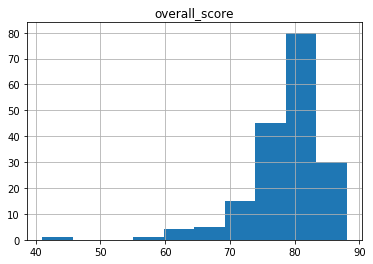

In [3]:
sleep_score_df.hist(column='overall_score')

## Heart Rate

Fitbit keeps their calculated heart rates in the sleep scores file rather than heart.
Knowing your resting heart rate is useful because it is a good indicator of your overall health.

![](restingHeartRate.jpg)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2917a6090>]],
      dtype=object)

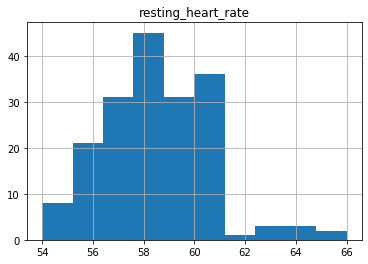

In [4]:
sleep_score_df.hist(column='resting_heart_rate')

## Resting Heart Rate Time Graph

Using the pandas wrapper we can quickly create a heart rate graph over time.

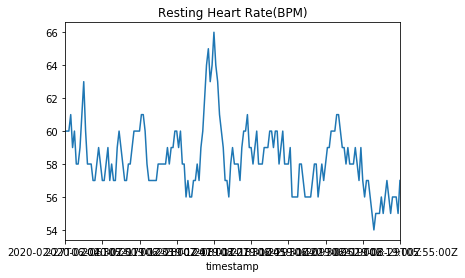

In [5]:
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate(BPM)")

However, as we notice with the graph above, the time axis is wack.
In the pandas data frame everything was stored as a string timestamp.
We can convert this into a datetime object by telling pandas to parse the date as it reads it.

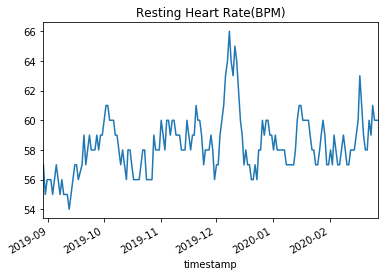

In [6]:
sleep_score_df = pd.read_csv('data/sleep/sleep_score.csv', parse_dates=[1])
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate(BPM)")

To fully manipulate the graphs, we need to use some matplotlib code to do things like setting the axis labels or make multiple plots right next to each other.
We can create grab the current axis being used by matplotlib by using plt.gca().

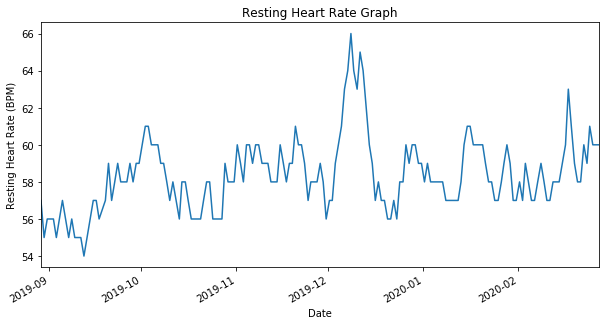

In [7]:
ax = plt.gca()
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate Graph", ax=ax, figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Resting Heart Rate (BPM)")
plt.show()
#plt.savefig('restingHeartRate.svg')

The same thing can be done with sleep scores.
It is interesting to note that  the sleep scores rarely vary anything between 75 and 85.

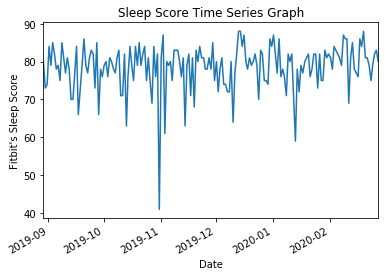

In [8]:
ax = plt.gca()
sleep_score_df.plot(kind='line', y='overall_score', x ='timestamp', legend=False, title="Sleep Score Time Series Graph", ax=ax)
plt.xlabel("Date")
plt.ylabel("Fitbit's Sleep Score")
plt.show()

Using Pandas we can generate a new column with a specific date attribute like year, day, month, or weekday.
If we add a new column for weekday, we can then group by weekday and collapse them all into a single column by summing or averaging the value.

In [9]:
temp = pd.DatetimeIndex(sleep_score_df['timestamp'])
sleep_score_df['weekday'] = temp.weekday

print(sleep_score_df)

     sleep_log_entry_id                 timestamp  overall_score  \
0           26093459526 2020-02-27 06:04:30+00:00             80   
1           26081303207 2020-02-26 06:13:30+00:00             83   
2           26062481322 2020-02-25 06:00:30+00:00             82   
3           26045941555 2020-02-24 05:49:30+00:00             79   
4           26034268762 2020-02-23 08:35:30+00:00             75   
..                  ...                       ...            ...   
176         23696231032 2019-09-02 07:38:30+00:00             79   
177         23684345925 2019-09-01 07:15:30+00:00             84   
178         23673204871 2019-08-31 07:11:00+00:00             74   
179         23661278483 2019-08-30 06:34:00+00:00             73   
180         23646265400 2019-08-29 05:55:00+00:00             80   

     composition_score  revitalization_score  duration_score  \
0                   20                    19              41   
1                   22                    21           

In [10]:
print(sleep_score_df.groupby('weekday').mean())

         sleep_log_entry_id  overall_score  composition_score  \
weekday                                                         
0              2.483733e+10      79.576923          20.269231   
1              2.485200e+10      77.423077          20.423077   
2              2.490383e+10      80.880000          21.120000   
3              2.483418e+10      76.814815          20.370370   
4              2.480085e+10      79.769231          20.961538   
5              2.477002e+10      78.840000          20.520000   
6              2.482581e+10      77.230769          20.269231   

         revitalization_score  duration_score  deep_sleep_in_minutes  \
weekday                                                                
0                   19.153846       40.153846              88.000000   
1                   19.000000       38.000000              83.846154   
2                   19.400000       40.360000              93.760000   
3                   19.037037       37.407407         

## Sleep Score Based on Day

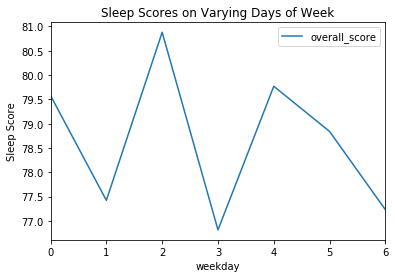

In [11]:
ax = plt.gca()
sleep_score_df.groupby('weekday').mean().plot(kind='line', y='overall_score', ax = ax)
plt.ylabel("Sleep Score")
plt.title("Sleep Scores on Varying Days of Week")
plt.show()

## Sleep Score Based on Days of Week

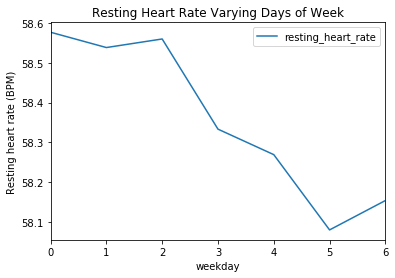

In [12]:
ax = plt.gca()
sleep_score_df.groupby('weekday').mean().plot(kind='line', y='resting_heart_rate', ax = ax)
plt.ylabel("Resting heart rate (BPM)")
plt.title("Resting Heart Rate Varying Days of Week")
plt.show()

# Calories

Fitbit keeps all of their calorie data in JSON files representing sequence data at 1 minute increments.
To extrapolate calorie data we need to group by day and then sum the days to get the total calories burned per day.

In [13]:
calories_df = pd.read_json("data/calories/calories-2019-07-01.json",  convert_dates=True)

In [14]:
print(calories_df)

                 dateTime  value
0     2019-07-01 00:00:00   1.07
1     2019-07-01 00:01:00   1.07
2     2019-07-01 00:02:00   1.07
3     2019-07-01 00:03:00   1.07
4     2019-07-01 00:04:00   1.07
...                   ...    ...
43195 2019-07-30 23:55:00   1.07
43196 2019-07-30 23:56:00   1.07
43197 2019-07-30 23:57:00   1.07
43198 2019-07-30 23:58:00   1.07
43199 2019-07-30 23:59:00   1.07

[43200 rows x 2 columns]


In [15]:
import datetime
calories_df['date_minus_time'] = calories_df["dateTime"].apply( lambda calories_df : 
    datetime.datetime(year=calories_df.year, month=calories_df.month, day=calories_df.day))	

calories_df.set_index(calories_df["date_minus_time"],inplace=True)

print(calories_df)

                           dateTime  value date_minus_time
date_minus_time                                           
2019-07-01      2019-07-01 00:00:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:01:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:02:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:03:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:04:00   1.07      2019-07-01
...                             ...    ...             ...
2019-07-30      2019-07-30 23:55:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:56:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:57:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:58:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:59:00   1.07      2019-07-30

[43200 rows x 3 columns]


In [16]:
calories_per_day = calories_df.resample('D').sum()
print(calories_per_day)

                   value
date_minus_time         
2019-07-01       3422.68
2019-07-02       2705.85
2019-07-03       2871.73
2019-07-04       4089.93
2019-07-05       3917.91
2019-07-06       2762.55
2019-07-07       2929.58
2019-07-08       2698.99
2019-07-09       2833.27
2019-07-10       2529.21
2019-07-11       2634.25
2019-07-12       2953.91
2019-07-13       4247.45
2019-07-14       2998.35
2019-07-15       2846.18
2019-07-16       3084.39
2019-07-17       2331.06
2019-07-18       2849.20
2019-07-19       2071.63
2019-07-20       2746.25
2019-07-21       2562.11
2019-07-22       1892.99
2019-07-23       2372.89
2019-07-24       2320.42
2019-07-25       2140.87
2019-07-26       2430.38
2019-07-27       3769.04
2019-07-28       2036.24
2019-07-29       2814.87
2019-07-30       2077.82


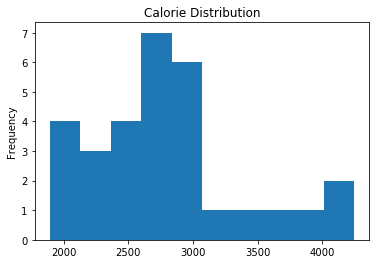

In [17]:
ax = plt.gca()
calories_per_day.plot(kind='hist', title="Calorie Distribution", legend=False, ax=ax)
plt.show()

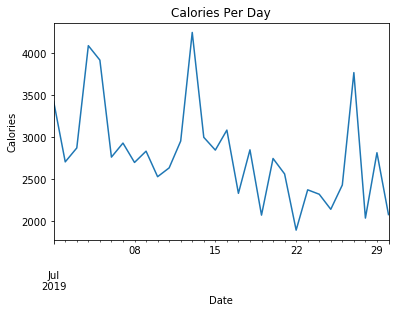

In [18]:
ax = plt.gca()
calories_per_day.plot(kind='line', y='value', legend=False, title="Calories Per Day", ax=ax)
plt.xlabel("Date")
plt.ylabel("Calories")
plt.show()

## Calories Per Day Box Plot

Using this data we can turn this into a boxplot to make it easier to visualize the distribution of calories burned during the month of July.

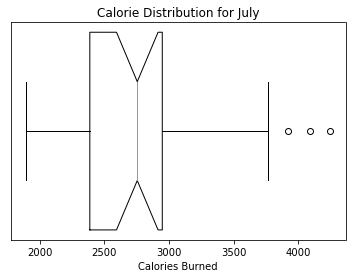

In [19]:
ax = plt.gca()
ax.set_title('Calorie Distribution for July')
ax.boxplot(calories_per_day['value'], vert=False,manage_ticks=False, notch=True)
plt.xlabel("Calories Burned")
ax.set_yticks([])
plt.show()

# Steps

Fitbit is known for taking the amount of steps someone takes per day.
Similar to calories burned, steps taken is stored in time series data at 1 minute increments.
Since we are interested at the day level data, we need to first remove the time component of the dataframe so that we can group all the data by date.
Once we have everything grouped by date, we can sum and produce steps per day. 

In [20]:
steps_df = pd.read_json("data/steps-2019-07-01.json",  convert_dates=True)

steps_df['date_minus_time'] = steps_df["dateTime"].apply( lambda steps_df : 
    datetime.datetime(year=steps_df.year, month=steps_df.month, day=steps_df.day))	

steps_df.set_index(steps_df["date_minus_time"],inplace=True)
print(steps_df)

                           dateTime  value date_minus_time
date_minus_time                                           
2019-07-01      2019-07-01 04:00:00      0      2019-07-01
2019-07-01      2019-07-01 04:01:00      0      2019-07-01
2019-07-01      2019-07-01 04:02:00      0      2019-07-01
2019-07-01      2019-07-01 04:03:00      0      2019-07-01
2019-07-01      2019-07-01 04:04:00      0      2019-07-01
...                             ...    ...             ...
2019-07-31      2019-07-31 03:55:00      0      2019-07-31
2019-07-31      2019-07-31 03:56:00      0      2019-07-31
2019-07-31      2019-07-31 03:57:00      0      2019-07-31
2019-07-31      2019-07-31 03:58:00      0      2019-07-31
2019-07-31      2019-07-31 03:59:00      0      2019-07-31

[41116 rows x 3 columns]


In [21]:
steps_per_day = steps_df.resample('D').sum()
print(steps_per_day)

                 value
date_minus_time       
2019-07-01       11285
2019-07-02        4957
2019-07-03       13119
2019-07-04       16034
2019-07-05       11634
2019-07-06        6860
2019-07-07        3758
2019-07-08        9130
2019-07-09       10960
2019-07-10        7012
2019-07-11        5420
2019-07-12        4051
2019-07-13       15980
2019-07-14       23109
2019-07-15       11247
2019-07-16       10170
2019-07-17        4905
2019-07-18       10769
2019-07-19        4504
2019-07-20        5032
2019-07-21        8953
2019-07-22        2200
2019-07-23        9392
2019-07-24        5666
2019-07-25        5016
2019-07-26        5879
2019-07-27       19492
2019-07-28        4987
2019-07-29        9943
2019-07-30        3897
2019-07-31         166


## Steps Per Day Histogram

After the data is in the form that we want, graphing the data is straight forward.
Two added things I like to do for normal box plots is to set the displays to horizontal add the notches. 

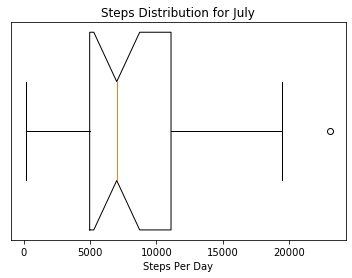

In [22]:
ax = plt.gca()
ax.set_title('Steps Distribution for July')
ax.boxplot(steps_per_day['value'], vert=False,manage_ticks=False, notch=True)
plt.xlabel("Steps Per Day")
ax.set_yticks([])
plt.show()

Wrapping that all into a single function we get something like this:

In [23]:
def readFileIntoDataFrame(fName):
    steps_df = pd.read_json(fName,  convert_dates=True)

    steps_df['date_minus_time'] = steps_df["dateTime"].apply( lambda steps_df : 
        datetime.datetime(year=steps_df.year, month=steps_df.month, day=steps_df.day))	

    steps_df.set_index(steps_df["date_minus_time"],inplace=True)
    return steps_df.resample('D').sum()

def graphBoxAndWhiskers(data, title, xlab):
    ax = plt.gca()
    ax.set_title(title)
    ax.boxplot(data['value'], vert=False, manage_ticks=False, notch=True)
    plt.xlabel(xlab)
    ax.set_yticks([])
    plt.show()

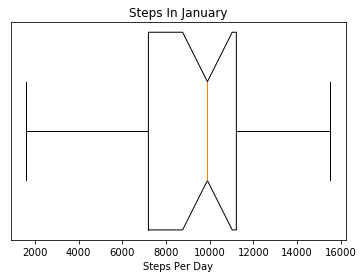

In [24]:
graphBoxAndWhiskers(readFileIntoDataFrame("data/steps-2020-01-27.json"), "Steps In January", "Steps Per Day")

That is cool, but, what if we could view the distribution for each month in the same graph?
Based on the two previous graphs, my step distribution during July looked distinctly different from my step distribution in January. 
The first difficultly would be to read in all the files since Fitbit creates a new file for every month.
The next thing would be to group them by month and then graph it.

In [25]:
import os
files = os.listdir("data")
print(files)

['steps-2019-04-02.json', 'steps-2019-08-30.json', 'steps-2020-02-26.json', 'steps-2019-10-29.json', 'steps-2019-07-01.json', 'steps-2020-01-27.json', 'steps-2019-07-31.json', 'steps-2019-06-01.json', 'steps-2019-09-29.json', '.ipynb_checkpoints', 'steps-2019-12-28.json', 'steps-2019-05-02.json', 'calories', 'steps-2019-11-28.json', 'sleep']


In [26]:
dfs = []
for file in files: # this can take 15 seconds
    if "steps" in file: # finds the steps files
        dfs.append(readFileIntoDataFrame("data/" + file))

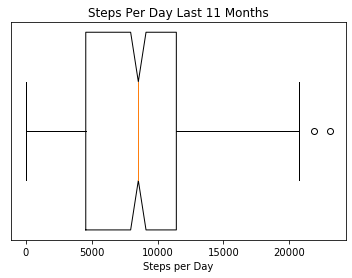

In [27]:
stepsPerDay = pd.concat(dfs)
graphBoxAndWhiskers(stepsPerDay, "Steps Per Day Last 11 Months", "Steps per Day")

In [28]:
print(type(stepsPerDay['value'].to_numpy()))
print(stepsPerDay['value'].keys())

stepsPerDay['month'] = pd.DatetimeIndex(stepsPerDay['value'].keys()).month 
stepsPerDay['week_day'] = pd.DatetimeIndex(stepsPerDay['value'].keys()).weekday

print(stepsPerDay)

<class 'numpy.ndarray'>
DatetimeIndex(['2019-04-03', '2019-04-04', '2019-04-05', '2019-04-06',
               '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12',
               ...
               '2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28'],
              dtype='datetime64[ns]', name='date_minus_time', length=342, freq=None)
                 value  month  week_day
date_minus_time                        
2019-04-03         510      4         2
2019-04-04       11453      4         3
2019-04-05       12684      4         4
2019-04-06       12910      4         5
2019-04-07        3368      4         6
...                ...    ...       ...
2019-12-24        5779     12         1
2019-12-25        4264     12         2
2019-12-26        4843     12         3
2019-12-27        9609     12         4
2019-12-28        221

## Graphing Steps by Month

Now that we have columns for the total amount of steps per day and the months, we can plot all the data on a single plot using the group by operator in the plotting library.

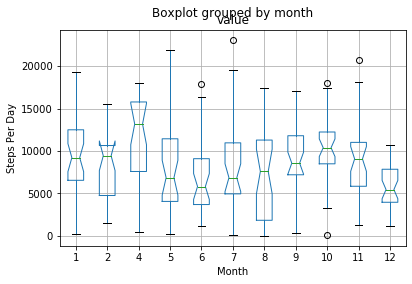

In [29]:
ax = plt.gca()
ax.set_title('Steps Distribution for July\n')
stepsPerDay.boxplot(column=['value'], by='month',ax=ax, notch=True)
plt.xlabel("Month")
plt.ylabel("Steps Per Day")
plt.show()

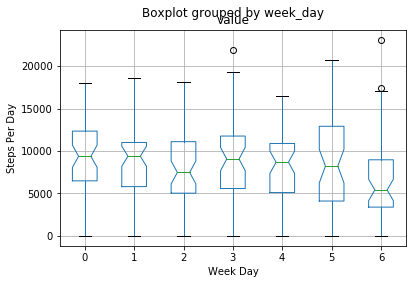

In [30]:
ax = plt.gca()
ax.set_title('Steps Distribution By Week Day\n')
stepsPerDay.boxplot(column=['value'], by='week_day',ax=ax, notch=True)
plt.xlabel("Week Day")
plt.ylabel("Steps Per Day")
plt.show()

## Future Work

Moving forward with this I would like to do more visualizations with sleep data and heart rate.